### **Aim**  
The motive of this assignment is to make predictions using **Linear Regression**. To make sure you truly understand how the underlying algorithm works, you are to implement it from scratch.

### Generating the dataset  
Run the cell below to create the dataset. It further splits the available data into training and testing. Please do not edit this cell.


In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=20, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

### Visualizing the data  
Use `matplotlib` to visualize the given data.

In [8]:
X_train.shape

(80, 5)

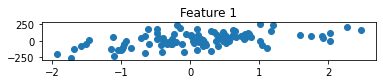

In [64]:
import matplotlib.pyplot as plt

plt.subplot(5,1,1)
plt.scatter(X[:,0],y)
plt.title("Feature 1")

plt.subplot(5,1,2)
plt.scatter(X[:,1],y)
plt.title("Feature 2")

plt.subplot(5,1,3)
plt.scatter(X[:,2],y)
plt.title("Feature 3")

plt.subplot(5,1,4)
plt.scatter(X[:,3],y)
plt.title("Feature 4")

plt.subplot(5,1,5)
plt.scatter(X[:,4],y)
plt.title("Feature 5")

plt.show()
# Your code here

You should be able to see the linear relations between `y` and the features in vector `X`.

### Gradient Descent Review  
1. ####  Cost function
Define the `cost function` to measure the difference between predictions and target outputs. Here, we are working with first degree polynomial, so derivatives are easy to calculate. ( Linear function `y = wx +b` )  

$$Error = \frac{1}{N}\sum_{i=1}^N (y_i - \overline{y}_i)^2 = \frac{1}{N}\sum_{i=1}^N (y_i - (x_iw+b))^2 $$  

  where `N` is the number of samples  
    


2. #### Compute the derivative
$$\frac{\delta Error}{\delta w} = \frac{2}{N}\sum_{i=1}^N -x_i(y_i -(m  x_i +b ))  $$
$$\frac{\delta Error}{\delta b} = \frac{2}{N}\sum_{i=1}^N -(y_i -(m  x_i +b ))  $$
3. <h4>Update current parameters</h4>
$$ w:= w- learning\_rate \cdot \frac{\delta Error}{\delta w}   $$ 
$$ b:= b- learning\_rate \cdot \frac{\delta Error}{\delta b}   $$ 
4. <h4>Repeat until it fits good enough</h4>


### Model definition

Complete the functions in the class below. Hints provided at appropriate places.

In [158]:
import numpy as np

class LinearRegression:

    # The __init__ is called when we make any object of our class. Here, you are to specify the default values for 
    # Learning Rate, Number of Iterations, Weights and Biases. It doesn't return anything.
    # Hint: Google what a `self pointer` is and figure out how it can be used here.
    def __init__(self, learning_rate=0.01, n_iters=10000):
        # Your code here
        self.learn = learning_rate;
        self.iter = n_iters;
        self.w = np.random.random(X_train.shape[1]);
        self.b = 0;
        
        # pass  # Uncomment this when you're done with this function


    # The following function would be the heart of the model. This is where the training would happen. 
    # You're supposed to iterate and keep on updating the weights and biases according to the steps of Gradient Descent.
    def fit(self, X, y):
        # Gradient Descent code goes here
        N = X.shape[0]
        # print(N)
        # print(np.square(y-(np.dot(X,self.w)+self.b).reshape(-1,1)))
        cost = (1/N)*np.sum(np.square(y-(np.dot(X,self.w)+self.b).reshape(-1,1)),axis=0);
        # print(cost);
        # print(-X*np.square((y-(np.dot(X,self.w)+self.b)))[:,None])
        for i in range(self.iter) :
          dw = (2/N)*np.sum(-1*X*(y-(np.dot(X,self.w)+self.b).reshape(-1,1)), axis=0);
          db = (2/N)*np.sum(-y+((np.dot(X,self.w)+self.b).reshape(-1,1)), axis=0);
          self.w = self.w-self.learn*dw
          self.b = self.b-self.learn*db
        
        # print(self.w)
        # print(self.b)
        # print(cost)
        # pass  # Uncomment this when you're done with this function
        
        
    # This function will be called after our model has been trained and we are predicting on unseen data
    # What is our prediction? Just return that
    def predict(self, X):
        # Code goes her
        return np.dot(X,self.w)+self.b
        # pass  # Uncomment this when you're done with this function

### Initializing, Training & Predictions

In [159]:
# Now, we make an object of our custom class.
regressor = LinearRegression() # You may pass the custom parameters or let the default values take it ahead

# Call the fit method on the object to train (pass appropriate part of dataset)
# print(np.dot(X_train,regressor.w))
# y_train = y_train[:]
y_train = y_train.reshape(-1,1);
# print(y_train.shape)
regressor.fit(X_train,y_train)

# Now, let's see our what our model predicts
predictions = regressor.predict(X_test) # pass appropriate part of dataset

In [160]:
predictions

array([ 207.90288602, -123.30753064,   78.36331292, -144.89131576,
          0.59146132,  -61.4096294 ,   42.99351375,   23.13379989,
       -134.95991245,  143.72552576,   76.94489743,  123.3435483 ,
         34.00548086,   90.25352353,   58.96486393,   86.1167232 ,
        201.84413768,   68.22770101,   95.03409129,  -65.65839881])

In [161]:
y_test

array([ 231.52987097, -127.73130463,   82.03512178, -114.56084875,
        -40.94506552,  -46.3723945 ,   17.14558018,   36.59841286,
       -144.50935547,  172.29644855,   52.02363624,  150.91337265,
         24.4817991 ,   77.51790564,   62.62990566,   76.3859825 ,
        195.3197199 ,   47.75398372,   78.13610249,  -76.28526953])

### Evaluate the model   

Return [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) & [R2 Score](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=%C2%AFy) from the functions below.

In [162]:
import sklearn.metrics as sk

def mean_squared_error(y_true, y_pred):
       # return the mean squared error
       return sk.mean_squared_error(y_true, y_pred)
      #  return (1/y_true.shape[0])*np.sum(np.square(y_true-y_pred), axis=0)
      #  pass  # Uncomment this when you're done with this function


def r2_score(y_true, y_pred):
      # return the r2 score
      return sk.r2_score(y_true, y_pred)
      # pass  # Uncomment this when you're done with this function
          

mse = mean_squared_error(predictions, y_test) # Pass appropriate parts of dataset
print("MSE:", mse)

accu = r2_score(predictions, y_test) # Pass appropriate parts of dataset
print("Accuracy:", accu)

MSE: 391.0960196890423
Accuracy: 0.9606065973728906
